In [10]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the dataset
df = pd.read_csv(r'C:\Users\lokes\Desktop\forecasting-project\data\Assessment-2-Associate-DS(in).csv')  # adjust path if needed

In [15]:
# Display basic info
print("🔍 Dataset Info:")
print(df.info())

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekend_date  600 non-null    object
 1   channel       600 non-null    object
 2   brand         600 non-null    object
 3   category      600 non-null    object
 4   sub_category  600 non-null    object
 5   SerailNum     600 non-null    int64 
 6   quantity      600 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 32.9+ KB
None


In [16]:
# Check for missing values
print("\n🧯 Missing Values:")
print(df.isnull().sum())
# Drop rows with missing weekend_date
# df = df[df['weekend_date'].notnull()]
# df.isnull().sum()


🧯 Missing Values:
weekend_date    0
channel         0
brand           0
category        0
sub_category    0
SerailNum       0
quantity        0
dtype: int64


In [17]:
# Check for duplicates
print("\n🔍 Duplicates:")
print(df.duplicated().sum())
# Drop duplicates
# df = df.drop_duplicates()
# df.duplicated().sum()


🔍 Duplicates:
0


In [18]:
# Rename the typo in column name
df.rename(columns={'SerailNum': 'SerialNum'}, inplace=True)

# Convert 'weekend_date' to datetime
df['weekend_date'] = pd.to_datetime(df['weekend_date'], dayfirst=True, errors='coerce')


In [19]:
# Display summary statistics
print("\n📊 Summary Statistics:")
print(df.describe(include='all'))


📊 Summary Statistics:
                         weekend_date   channel brand category sub_category  \
count                             494       600   600      600          600   
unique                            NaN         3     2        3            4   
top                               NaN  Channel2    B1     Cat3     Sub-Cat4   
freq                              NaN       376   418      373          191   
mean    2023-08-29 00:46:38.380566784       NaN   NaN      NaN          NaN   
min               2022-05-28 00:00:00       NaN   NaN      NaN          NaN   
25%               2023-03-12 18:00:00       NaN   NaN      NaN          NaN   
50%               2023-09-09 00:00:00       NaN   NaN      NaN          NaN   
75%               2024-03-02 00:00:00       NaN   NaN      NaN          NaN   
max               2024-08-31 00:00:00       NaN   NaN      NaN          NaN   
std                               NaN       NaN   NaN      NaN          NaN   

         SerialNum     quant

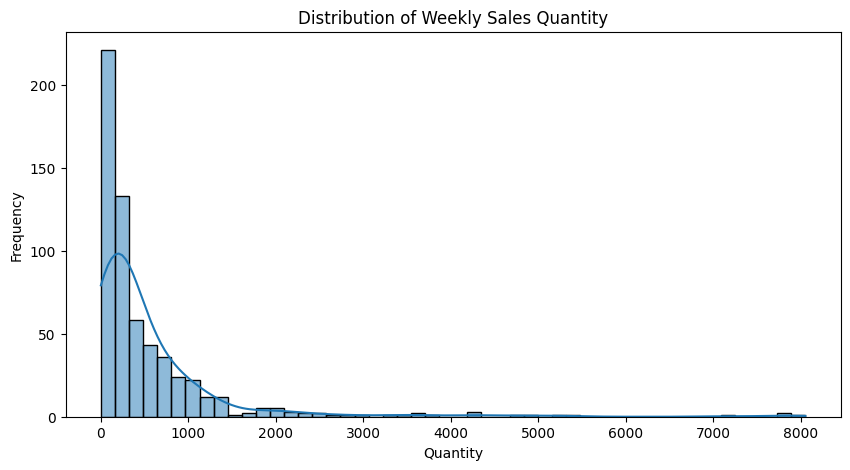

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['quantity'], bins=50, kde=True)
plt.title("Distribution of Weekly Sales Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()


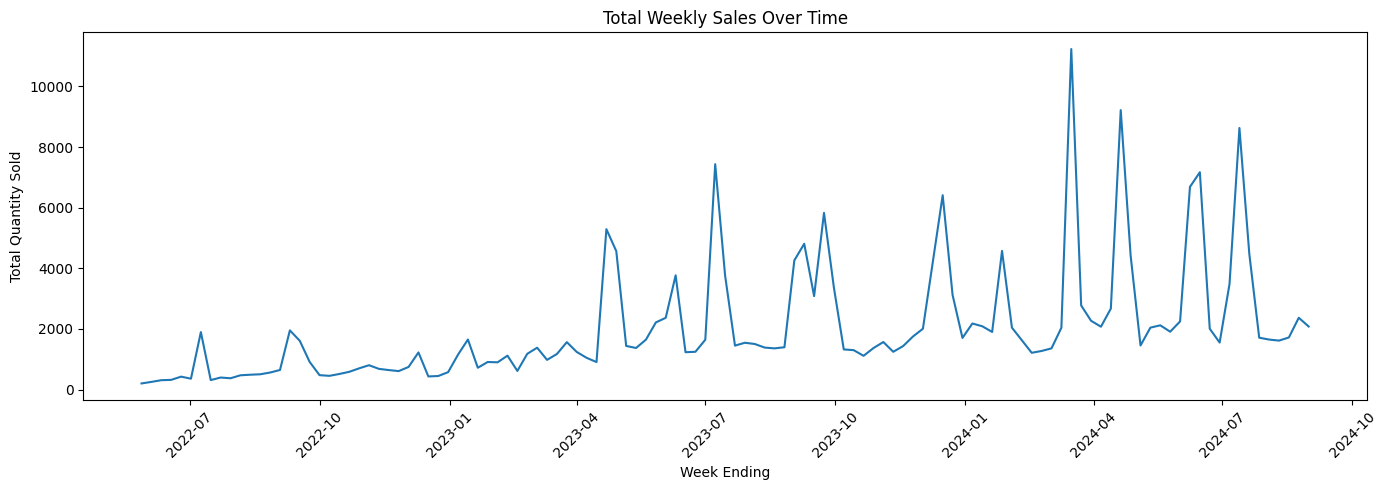

In [9]:
# Filter valid dates
df_valid = df[df['weekend_date'].notnull()]

# Aggregate quantity by week
weekly_sales = df_valid.groupby('weekend_date')['quantity'].sum().reset_index()

# Plot
plt.figure(figsize=(14, 5))
sns.lineplot(data=weekly_sales, x='weekend_date', y='quantity')
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Week Ending")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
